# Определение перспективного тарифа для телеком-компании

**Описание исследования**

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов «Мегалайн». Проанализировать их поведение и сделать вывод — какой тариф лучше.
 

**Цель исследования** — проверить гипотезы:
* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


**Описание даннных**

Входные данные - данные 500 пользователей «Мегалайна»: 5 таблиц с информацией о звонках, пользователях, трафике, кол-ве сообщений и их тарифах.

Таблица users (информация о пользователях):
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана
9. Таблица calls (информация о звонках):
10. id — уникальный номер звонка
11. call_date — дата звонка
12. duration — длительность звонка в минутах
13. user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


**Ход исследования**

Перед тем, как непосредственно перейти к проверке гипотез необходимо провести их обзор, предобработку, подготовку и анализ.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Подготовка данных: рассчеты.
 4. Исследовательский анализ
 5. Проверка гипотез

## Изучение данных из файла

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Откроем датасет calls
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.sort_values(by='duration')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
57375,1145_206,2018-07-06,0.00,1145
57380,1145_211,2018-09-25,0.00,1145
57381,1145_212,2018-04-23,0.00,1145
157627,1391_108,2018-11-28,0.00,1391
...,...,...,...,...
60889,1153_135,2018-11-16,35.95,1153
39777,1099_150,2018-08-14,36.12,1099
5865,1017_61,2018-11-13,36.47,1017
178737,1446_22,2018-11-07,37.35,1446


In [3]:
# Получим общую информацию
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
# Посчитаем кол-во пользователей
len(data_calls['user_id'].unique())

492

In [5]:
# Откроем датасет internet
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.sort_values(by='mb_used')

,Unnamed: 0,id,mb_used,session_date,user_id
116616,116616,1393_102,0.00,2018-06-03,1393
53410,53410,1179_272,0.00,2018-08-11,1179
104303,104303,1353_239,0.00,2018-10-26,1353
19438,19438,1065_583,0.00,2018-03-26,1065
19437,19437,1065_582,0.00,2018-07-14,1065
...,...,...,...,...,...
140299,140299,1471_182,1623.92,2018-07-29,1471
103480,103480,1348_138,1651.25,2018-10-31,1348
7063,7063,1024_118,1651.55,2018-11-15,1024
119156,119156,1402_191,1702.75,2018-10-26,1402


In [6]:
# Получим общую информацию
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# Посчитаем кол-во пользователей
len(data_internet['user_id'].unique())

497

In [8]:
# Откроем датасет messages
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head(20)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [9]:
# Получим общую информацию
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
# Посчитаем кол-во пользователей
len(data_messages['user_id'].unique())

426

In [11]:
# Откроем датасет tariffs
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
# Откроем датасет users
data_users = pd.read_csv('/datasets/users.csv')
data_users.sort_values(by='age')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
77,1077,18,NaN,Москва,Марица,Кольцова,2018-10-23,smart
204,1204,18,NaN,Москва,Мирослава,Лазарева,2018-01-04,smart
270,1270,18,NaN,Нижневартовск,Мальвина,Вешнякова,2018-07-01,ultra
268,1268,18,NaN,Москва,Трофим,Трошин,2018-05-28,smart
473,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra
...,...,...,...,...,...,...,...,...
254,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra
436,1436,75,NaN,Москва,Радим,Ерофеев,2018-04-04,ultra
478,1478,75,NaN,Грозный,Таира,Константинова,2018-07-16,smart
177,1177,75,NaN,Новосибирск,Лолита,Аничкина,2018-06-19,smart


In [13]:
# Получим общую информацию
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод:** 
- Ни в одной таблице пропусков нет, кроме таблицы data_users в столбце churn_date, однако они не являются ошибкой, это значит, что пользователь не прекращал пользоваться тарифом. 
- В таблице data_internet имеется столбец Unnamed: 0, дублирующий индексацию, от него можно избавится. 
- Так как "Мегалайн" округляет секунды до минут в столбце duration в таблице data_calls можно изменить тип данных на int и округлить в большую сторону. 
- Также для экономии памяти в некоторых столбцах можно изменить тип данных с float64 на float32. 
- Что касается количества пользователей, то оно неодинаково, однако это вряд ли может быть ошибкой. Скорее всего в таблицах нет данных об пользователях, если они не совершали звонки, не писали сообщения или не выходили в интернет. Это надо будет учесть в дальнейшем. 
- Подозрительных количественных значений обнаружено не было.

## Предобработка данных

### Устранение ошибок

In [14]:
# Избавимся от столбца Unnamed: 0 в таблице data_internet
data_internet = data_internet.drop(columns='Unnamed: 0')
data_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


### Изменение типов данных

In [15]:
# Округлим данные в большую сторону и проверим
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [16]:
# Изменим тип данных на int
data_calls['duration'] = data_calls['duration'].astype('int')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  object
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  int64 
 3   user_id    202607 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.2+ MB


In [17]:
# Изменим тип данных в столбце mb_used таблицы data_internet на float32 и проверим
data_internet['mb_used'] = data_internet['mb_used'].astype('float32')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float32
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float32(1), int64(1), object(2)
memory usage: 4.0+ MB


**Вывод:** таким образом, была удалена ненужная информация, данные преобразованы в необходимые типы

## Подготовка данных: расчёты

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Для рассчета количества сделанных звонков и израсходованных минут разговора по месяцам нам понадобится добавить отдельную колонку с информацией о месяце в таблицу data_calls

In [18]:
# Так как в таблице даны данные за один год можно использовать метод DatetimeIndex, применим его
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [19]:
# Проверим
data_calls['month'].unique()

array([ 7,  8,  6,  9, 12, 11, 10,  5,  3,  4,  1,  2])

In [20]:
# Теперь у нас достаточно данных для группировки по месяцам с помощью сводных таблиц
data_calls_pivot = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum', 'count'])
data_calls_pivot

sum    count
              duration duration
user_id month                  
1000    5          159       22
        6          172       43
        7          340       47
        8          408       52
        9          466       58
...                ...      ...
1498    10         247       41
1499    9           70        9
        10         449       68
        11         612       74
        12         492       69

[3174 rows x 2 columns]

In [21]:
# Изменим название столбцоы
data_calls_pivot.columns=['call_duration', 'calls_count']
data_calls_pivot

call_duration  calls_count
user_id month                            
1000    5                159           22
        6                172           43
        7                340           47
        8                408           52
        9                466           58
...                      ...          ...
1498    10               247           41
1499    9                 70            9
        10               449           68
        11               612           74
        12               492           69

[3174 rows x 2 columns]

Все в порядке, можно перейти к следующим расчетам

### Количество отправленных сообщений по месяцам

Для рассчета количества отправленных сообщений по месяцам также создадим отдельный столбец с номером месяца в таблице data_messages с помощью DatetimeIndex

In [22]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [23]:
# проверим
data_messages['month'].unique()

array([ 6, 10,  8, 12, 11,  5,  7,  9,  3,  4,  2,  1])

In [24]:
# Сгруппируем данные по месяцам и найдем количество отправленных сообщений для каждого пользователя
data_messages_pivot = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
data_messages_pivot

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

Все в порядке, можно перейти к следующим расчетам

### Объем израсходованного интернет-трафика по месяцам

Для рассчета объема израсходованного интернет-трафика по месяцам также создадим отдельный столбец с номером месяца в таблице data_internet с помощью DatetimeIndex

In [25]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.949997,2018-11-25,1000,11
1,1000_1,1052.810059,2018-09-07,1000,9
2,1000_2,1197.260010,2018-06-25,1000,6
3,1000_3,550.270020,2018-08-22,1000,8
4,1000_4,302.559998,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.899994,2018-10-03,1499,10
149392,1499_153,490.130005,2018-12-14,1499,12
149393,1499_154,0.000000,2018-10-27,1499,10
149394,1499_155,1246.319946,2018-11-26,1499,11


In [26]:
# проверим
data_internet['month'].unique()

array([11,  9,  6,  8, 10,  7, 12,  5,  2,  3,  4,  1])

In [27]:
# Сгруппируем данные по месяцам
data_internet_pivot = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
data_internet_pivot

mb_used
user_id month              
1000    5       2253.489990
        6      23233.769531
        7      14003.639648
        8      14055.929688
        9      14568.910156
...                     ...
1498    10     20579.359375
1499    9       1845.750000
        10     17788.509766
        11     17963.310547
        12     13055.580078

[3203 rows x 1 columns]

In [28]:
# Так как "Мегалайн" откругляет итоговый траффик мегабайт до целого числа гигабайт, нам необходимо сделать тоже самое
data_internet_pivot = data_internet_pivot/1024
data_internet_pivot

mb_used
user_id month           
1000    5       2.200674
        6      22.689228
        7      13.675429
        8      13.726494
        9      14.227451
...                  ...
1498    10     20.097031
1499    9       1.802490
        10     17.371592
        11     17.542295
        12     12.749590

[3203 rows x 1 columns]

In [29]:
data_internet_pivot = np.ceil(data_internet_pivot)
data_internet_pivot

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

In [30]:
# Изменим название столбца mb_used на gb_used
data_internet_pivot = data_internet_pivot.rename(columns={'mb_used': 'gb_used'})

### Помесячная выручка с каждого пользователя

In [31]:
# Объединим все таблицы
data_final = data_calls_pivot.merge(data_internet_pivot, on=('user_id','month'), how='outer')
data_final

call_duration  calls_count  gb_used
user_id month                                     
1000    5              159.0         22.0      3.0
        6              172.0         43.0     23.0
        7              340.0         47.0     14.0
        8              408.0         52.0     14.0
        9              466.0         58.0     15.0
...                      ...          ...      ...
1489    8                NaN          NaN     11.0
        9                NaN          NaN     17.0
        10               NaN          NaN     20.0
        11               NaN          NaN     18.0
        12               NaN          NaN     17.0

[3214 rows x 3 columns]

In [32]:
# Добавим информацию о тарифах
data_final = data_final.merge(data_messages_pivot, on=('user_id','month'), how='outer')

In [33]:
# Чтобы добавить в получившуюся таблицу названия тарифов, надо перевести индексы
data_final = data_final.reset_index()

In [34]:
# Подготовим таблицу data_users к объединению, оставив только информацию об id, тарифе и городе проживания. Также переведем индексы
data_users = data_users[['user_id', 'tariff', 'city']].reset_index()

In [35]:
# Подготовим таблицу data_tariffs к объединению, изменив название для общего столбца
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})

In [36]:
# Объединим таблицы
data_final = data_final.merge(data_users, on='user_id', how='outer')
data_final = data_final.merge(data_tariffs, on='tariff', how='outer')
data_final

,user_id,month,call_duration,calls_count,gb_used,id,index,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,22.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,23.0,60.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,14.0,75.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,14.0,81.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,15.0,57.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,17.0,32.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,20.0,21.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,18.0,20.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,17.0,35.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3


In [37]:
# Заменим NaN на 0, так как пропуски значат то, что человек не делал звонки, не отправлял сообщения, не тратил трафик
data_final = data_final.fillna(0)

In [38]:
# Приведем числовые обозначения месяцев к целому виду
data_final['month'] = data_final['month'].astype('int')

In [39]:
# С помощью метода np.where найдем помесячную выручку со звонков
data_final['calls_revenue'] = np.where(data_final['call_duration'] > data_final['minutes_included'], data_final['call_duration'] - data_final['minutes_included'], 0)

In [40]:
# Аналогично найдем выручку с сообщений, данные сохраним в столбце messages_revenue
data_final['messages_revenue'] = np.where(data_final['id'] > data_final['messages_included'], data_final['id'] - data_final['messages_included']* data_final['rub_per_message'], 0)

In [41]:
# Аналогично найдем выручку с интернета, данные сохраним в столбце internet_revenue
data_final['internet_revenue'] = np.where(data_final['gb_used'] > data_final['mb_per_month_included']/1024, (data_final['gb_used'] - data_final['mb_per_month_included']/1024) * data_final['rub_per_gb'], 0)
data_final

,user_id,month,call_duration,calls_count,gb_used,id,index,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue
0,1000,5,159.0,22.0,3.0,22.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,172.0,43.0,23.0,60.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,340.0,47.0,14.0,75.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,408.0,52.0,14.0,81.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,466.0,58.0,15.0,57.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9,0.0,0.0,17.0,32.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0
3212,1489,10,0.0,0.0,20.0,21.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,1000.0
3213,1489,11,0.0,0.0,18.0,20.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,600.0
3214,1489,12,0.0,0.0,17.0,35.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0


In [42]:
# Суммируем значения столбцов calls_revenue, messages_revenue, internet_revenue и rub_monthly_fee для того чтобы подсчитать общую выручку
data_final['total_income'] = (data_final[['calls_revenue', 'messages_revenue', 'internet_revenue']].sum(axis=1))+data_final['rub_monthly_fee']
data_final

,user_id,month,call_duration,calls_count,gb_used,id,index,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_revenue,messages_revenue,internet_revenue,total_income
0,1000,5,159.0,22.0,3.0,22.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,172.0,43.0,23.0,60.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,340.0,47.0,14.0,75.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,408.0,52.0,14.0,81.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,466.0,58.0,15.0,57.0,0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9,0.0,0.0,17.0,32.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3212,1489,10,0.0,0.0,20.0,21.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3213,1489,11,0.0,0.0,18.0,20.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3214,1489,12,0.0,0.0,17.0,35.0,489,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,400.0,950.0


**Вывод:** таким образом, было посчитано количество звонков и минут, количество отправленных сообщений и объем израсходованного трафика для каждого пользователя по месяцам. Далее была рассчитана помесячная выручка аналогично с каждого пользователя.

## Исследовательский анализ данных

### Исследование длительности звонков

Посчитаем среднюю длительность звонков, дисперсию и стандартное отклонение по месяцам для разных тарифов с помощью сводных таблиц. Перезапишем неиспользуемую переменную data_calls_pivot для экономии памяти.

In [43]:
data_calls_pivot = data_final.pivot_table(index='month', columns='tariff', values='call_duration', aggfunc=('mean', 'std', 'var')).query('month != 0')
data_calls_pivot

mean                     std                       var  \
tariff       smart       ultra       smart       ultra         smart   
month                                                                  
1       203.852941  428.111111  154.231454  269.757968  23787.341355   
2       298.689655  297.125000  190.820041  296.512528  36412.287961   
3       390.051948  489.648649  191.893604  333.743765  36823.155161   
4       367.133929  458.018182  186.489161  267.682405  34778.207127   
5       387.361702  510.328358  186.601343  289.603511  34820.061094   
6       395.640244  479.702381  175.336587  302.549081  30742.918861   
7       408.353234  545.791209  179.583601  307.119322  32250.269602   
8       421.468085  510.775701  186.530382  312.980026  34793.583379   
9       428.611538  539.443478  183.126576  325.141162  33535.342723   
10      426.136054  558.081301  188.128510  326.289110  35392.336375   
11      435.265823  541.380597  177.778618  310.757232  31605.237050   
12      478.560831  592.805755  199.245131  342.456321  39698.622033   

                       
tariff          ultra  
month                  
1        72769.361111  
2        87919.679348  
3       111384.900901  
4        71653.870034  
5        83870.193578  
6        91535.946500  
7        94322.278144  
8        97956.496385  
9       105716.775286  
10      106464.583500  
11       96570.057064  
12      117276.331561

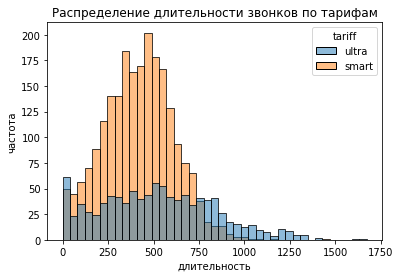

In [44]:
# Построим гистограмму с длительностью звонков в месяц для разных тарифов
sns.histplot(data=data_final, x='call_duration', hue = 'tariff').set(ylabel='частота', xlabel='длительность', title='Распределение длительности звонков по тарифам')
plt.show()

**Вывод:** 
- Судя по таблице, пользователи тарифа Ultra в среднем разговаривают дольше, чем пользователи тарифа Smart.
- Стандартное отклонение достаточно высокое для обоих тарифов, что может говорить о большом разбросе данных.
- Пользователи обоих тарифов в среднем не переходят порог бесплатного лимита, однако судя по стандартному отклонению и значениях, близких к порогу, для пользователей тарифа Smart более характерно переплачивание.
- На гистограмме также видно, что звонки пользователей тарифа Ultra длятся значительно дольше.
- Распределения похожи на нормальные.

### Исследование количества отправленных сообщений

Посчитаем среднее количество отправленных сообщений, дисперсию и стандартное отклонение по месяцам для разных тарифов с помощью сводных таблиц. Перезапишем неиспользуемую переменную data_messages_pivot для экономии памяти.

In [45]:
data_messages_pivot = data_final.pivot_table(index='month', columns='tariff', values='id', aggfunc=('mean', 'std', 'var')).query('month != 0')
data_messages_pivot

mean                   std                    var             
tariff      smart      ultra      smart      ultra       smart        ultra
month                                                                      
1       18.235294  33.777778  16.197753  30.670742  262.367201   940.694444
2       24.086207  21.958333  21.750809  26.773574  473.097701   716.824275
3       31.857143  32.297297  26.804710  41.621886  718.492481  1732.381381
4       30.741071  31.563636  24.538532  37.513831  602.139559  1407.287542
5       33.773050  37.850746  27.036845  40.306874  730.990983  1624.644052
6       33.402439  41.726190  28.404337  44.567899  806.806374  1986.297619
7       33.751244  49.846154  28.282288  48.703621  799.887811  2372.042735
8       33.638298  48.439252  28.952677  46.601923  838.257501  2171.739199
9       33.638462  52.286957  28.117927  46.398874  790.617820  2152.855530
10      33.765306  58.430894  28.567673  51.934398  816.111966  2697.181661
11      34.075949  55.791045  28.389031  49.768951  805.937071  2476.948491
12      35.994065  60.611511  30.576990  51.787821  934.952346  2681.978417

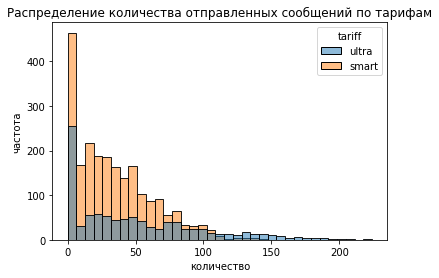

In [46]:
# Построим гистограмму со среднем количеством отправленных сообщений в месяц для разных тарифов
sns.histplot(data=data_final, x='id', hue = 'tariff').set(ylabel='частота', xlabel='количество', title='Распределение количества отправленных сообщений по тарифам')
plt.show()

**Вывод:** 
- Судя по таблице пользователи тарифа Ultra в среднем отправляют больше сообщений, чем пользователи тарифа Smart. 
- Стандартное отклонение достаточно высокое для обоих тарифов, что может говорить о большом разбросе данных.
- Пользователи обоих тарифов в среднем не переходят порог бесплатного лимита. Судя по стандартному отклонению и значениях, близких к порогу, для пользователей тарифа Smart более характерно переплачивание, для пользователей тарифа Ultra оно не вероятно (исходя из закона трех сигм).
- На гистограмме также видно, что количество сообщений пользователей тарифа Ultra больше, однако посылают они их не так часто, как пользователи тарифа Smart, у которых более однородная статистика.
- Распределение данных обоих тарифов не похоже на нормальное. Вероятно, это можно обьяснить небольшим количеством наблюдений из-за снижения актуальности сообщений.

### Исследование израсходованного интернет-трафика

Посчитаем среднее количество израсходованных гигобайт, дисперсию и стандартное отклонение по месяцам для разных тарифов с помощью сводных таблиц. Перезапишем неиспользуемую переменную data_internet_pivot для экономии памяти.

In [47]:
data_internet_pivot = data_final.pivot_table(index='month', columns='tariff', values='gb_used', aggfunc=('mean', 'std', 'var')).query('month != 0')
data_internet_pivot

mean                  std                   var            
tariff      smart      ultra     smart      ultra      smart       ultra
month                                                                   
1        8.735294  13.222222  6.277950   6.666667  39.412655   44.444443
2       11.844828  12.000000  6.095157  10.446551  37.150936  109.130432
3       15.233767  17.648649  5.705252  10.693238  32.549896  114.345345
4       13.625000  16.963636  5.594600   9.457436  31.299549   89.443100
5       15.907802  19.373135  5.862594   9.779130  34.370010   95.631386
6       15.951220  18.940475  5.649046   9.077114  31.911716   82.394005
7       15.875622  20.505495  5.780956   9.819905  33.419453   96.430527
8       16.736170  19.598131  5.480986  10.254184  30.041208  105.148300
9       16.392307  19.243479  5.087643   9.287410  25.884111   86.255989
10      16.880953  20.065041  5.735594   9.552907  32.897041   91.258034
11      17.000000  19.805969  5.213535   9.684867  27.180952   93.796654
12      18.201780  21.741007  5.457705  10.160550  29.786545  103.236786

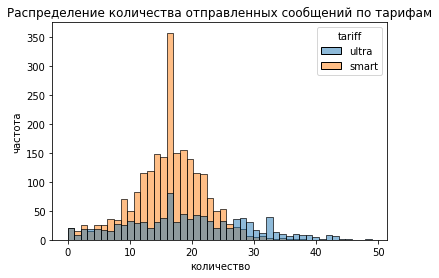

In [48]:
# Построим гистограмму с количеством израсходованных гб в месяц для разных тарифов
sns.histplot(data=data_final, x='gb_used', hue = 'tariff').set(ylabel='частота', xlabel='количество', title='Распределение количества отправленных сообщений по тарифам')
plt.show()

**Вывод:** 
- Судя по таблице, пользователи тарифа Ultra в среднем пользуются интернетом больше, чем пользователи тарифа Smart.
- Стандартное отклонение относительно среднее для обоих тарифов, что может говорить об умеренном разбросе данных.
- Пользователи тарифа Smart в среднем переходят порог бесплатного лимита или близки к нему, для пользователей тарифа Ultra это не характерно, однако судя по стандартному отклонению и для них вероятно переплачивание.
- На гистограмме также видно, что количество израсходованных гб для тарифа Ultra больше.
- Распределения похожи на нормальные.

## Проверка гипотез

### Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. 
- Н1 = средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Чтобы проверить эту гипотезу нам надо сравнить средние двух выборок. Для проверки статистической значимости результатов используют метод scipy.stats.ttest_ind(). Подготовим данные.

In [49]:
data_ultra = data_final.query('tariff == "ultra"')
data_ultra = data_ultra['total_income']

In [50]:
len(data_ultra)

986

In [51]:
data_smart = data_final.query('tariff == "smart"')
data_smart = data_smart['total_income']

In [52]:
len(data_smart)

2230

Несмотря на то, что выборки не одного размера, они достаточно большие, так что мы можем предположить, что их дисперсии примерно равны и оставить параметр equal_var=True. Пороговое значение alpha принято считать равным 0.05

In [53]:
# Проверим нулевую гипотезу
alpha = 0.05
st.ttest_ind(data_ultra, data_smart).pvalue < alpha

True

P-value меньше значения alpha: отвергаем нулевую гипотезу

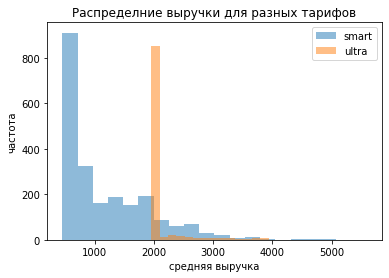

In [54]:
# Для наглядности построим график обеих выборок
data_smart.plot(kind='hist', bins=20, alpha=0.5)
data_ultra.plot(kind='hist', bins=20, alpha=0.5).set(ylabel='частота', xlabel='средняя выручка', title='Распределние выручки для разных тарифов')
plt.legend(['smart', 'ultra'])
plt.show()

In [55]:
# Дополнительно посчитаем среднюю выручку с каждого пользователя тарифа ultra в месяц
data_ultra.mean()

2070.030425963489

In [56]:
# Посчитаем среднюю выручку в месяц в целом по тарифу ultra
data_ultra.mean()*len(data_final.query('tariff == "ultra"').groupby('user_id')['total_income'].mean())

308434.53346855985

In [57]:
# Посчитаем среднюю выручку с каждого пользователя тарифа smart в месяц
data_smart.mean()

1169.5816143497757

In [58]:
# Посчитаем среднюю выручку в месяц в целом по тарифу smart
data_smart.mean()*len(data_final.query('tariff == "smart"').groupby('user_id')['total_income'].mean())

410523.1466367713

**Вывод:** 
- таким образом, гипотезу о равенстве двух средних мы не можем принять, следовательно **гипотезу** о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, **мы отклонить не можем**
- судя по полученным числам, средняя выручка с пользователя тарифа Ultra выше, однако пользователей тарифа Smart значительно больше и среднемесячная выручка с них также больше.

### Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы. Нулевая гипотеза - консервативная гипотеза: 
- H0 = средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- Н1 = средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Чтобы проверить эту гипотезу нам надо сравнить средние двух выборок. Для проверки статистической значимости результатов используют метод scipy.stats.ttest_ind(). Подготовим данные.

In [59]:
data_moscow = data_final.query('city == "Москва"')
data_moscow = data_moscow['total_income']

In [60]:
len(data_moscow)

611

In [61]:
data_not_moscow = data_final.query('city != "Москва"')
data_not_moscow = data_not_moscow['total_income']

In [62]:
len(data_not_moscow)

2605

Несмотря на то, что выборки не одного размера, они достаточно большие, так что мы можем предположить, что их дисперсии примерно равны и оставить параметр equal_var=True. Пороговое значение alpha принято считать равным 0.05.

In [63]:
# Проверим нулевую гипотезу:
alpha = 0.05
st.ttest_ind(data_moscow, data_not_moscow).pvalue < alpha

False

P-value больше значения alpha: мы не можем отклонить нулевую гипотезу

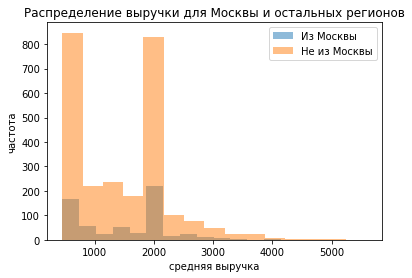

In [64]:
# Для наглядности построим график для обеих выборок
data_moscow.plot(kind='hist', bins=15, alpha=0.5)
data_not_moscow.plot(kind='hist', bins=15, alpha=0.5).set(ylabel='частота', xlabel='средняя выручка', title='Распределение выручки для Москвы и остальных регионов')
plt.legend(['Из Москвы', 'Не из Москвы'])
plt.show()

**Вывод:** таким образом, мы не можем опровергнуть гипотезу о равенстве двух средних, следовательно мы **не можем подтвердить гипотезу** о том, что средняя выручка пользователей из Москвы и из других регионов различается. Однако по графику заметно, что выручка пользователей не из Москвы сильно отличается.

## Общий вывод

Таким образом, исследование было выполнено в пять этапов:

1. **Обзор данных.** На этом этапе были изучены 4 таблицы на предмет пропусков и аномалий.
2. **Предобработка данных.** На данном этапе были устранены аномалии и изменены типы данных на нужные.
3. **Подготовка данных: рассчеты.** На этом этапе были посчитано помесячное количество звонков, количество отправленных сообщений, объем израсходованного интернет-трафика. Исходя из этих данных была посчитана помесячная выручка с каждого пользователя.
4. **Исследовательский анализ**. На этом этапе было проанализированно поведение клиентов "Мегалайн", посчитаны среднее, дисперсия и стандартное отлонение.
5. **Проверка гипотез.** На этом этапе гипотезы были проверены на статистическую значимость и сделаны выводы.

**Исследовательский анализ: выводы**
- **Исследование длительности звонков:** пользователи тарифа Ultra в среднем разговаривают дольше, чем пользователи тарифа Smart. Пользователи обоих тарифов в среднем не переходят порог бесплатного лимита, однако судя по стандартному отклонению и значениях, близких к порогу, для пользователей тарифа Smart более характерно переплачивание.
- **Исследование количества отправленных сообщений:** пользователи тарифа Ultra в среднем отправляют больше сообщений, чем пользователи тарифа Smart. Пользователи обоих тарифов в среднем не переходят порог бесплатного лимита. Судя по стандартному отклонению и значениях, близких к порогу, для пользователей тарифа Smart более характерно переплачивание, для пользователей тарифа Ultra оно не вероятно (исходя из закона трех сигм).
- **Исследование израсходованного интернет-трафика:** пользователи тарифа Ultra в среднем пользуются интернетом больше, чем пользователи тарифа Smart. Пользователи тарифа Smart в среднем переходят порог бесплатного лимита или близки к нему, для пользователей тарифа Ultra это не характерно, однако судя по стандартному отклонению и для них вероятно переплачивание.

**Проверка гипотез: выводы**
1. Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - не отклонена.
2. Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - не была подтверждена.

**Вывод:** судя по графику средней помесячной выручки с каждого пользователя smart и ultra, а также средней выручки в месяц в целом с обоих тарифов (Ultra ~ 308000 руб., Smart ~ 410000 руб.) и учитывая сильную разницу в количестве пользователей обоих тарифов (пользователей тарифа Smart гораздо больше), можно сделать вывод, что тариф Smart является более прибыльным тарифом.